In [38]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import tabula
import warnings
from pydicom.data import get_testdata_files
from PIL import Image

In [33]:
image_path = "../data/curated/drsbru/DATA_DICOM/drsbru_002/drsbru_002_POST.dcm"
dcm_img = pydicom.dcmread(image_path)

In [34]:
dcm_img.pixel_array.shape

(120, 128, 128)

In [32]:
dcm_img

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 210
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Nuclear Medicine Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.313776221711550739439900827032605284126
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.3.100.7.1
(0002, 0013) Implementation Version Name         SH: 'MATLAB IPT 7.1'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'DYNAMIC', 'EMISSION']
(0008, 0014) Instance Creator UID                UI: 2.16.840.1.113662.5.1949931217
(0008, 0016) SOP Class UID                       UI: Nuclear Medicine Image Storage
(0008, 

In [25]:
image = dcm_img.pixel_array.astype(float)[0]
image = (np.maximum(image, 0) / image.max()) * 255
image = np.uint8(image)
image = Image.fromarray(image)

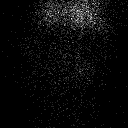

In [26]:
image

In [48]:
%%capture
tabula.convert_into("../data/curated/drsbru/table_2_drsbru_patient_data_140504.pdf", "../data/curated/drsbru/table_2_drsbru_patient_data_140504.csv", pages="all", output_format="csv", silent=True);

In [49]:
df = pd.read_csv("../data/curated/drsbru/table_2_drsbru_patient_data_140504.csv")
df.head()

,study name,gender,age\ryrs,GFR\rml/min,% LK\rintegral,% LK\rPR plot,NORA\r(20) LK,NORA\r(PM) LK,NORA\r(20) RK,NORA\r(PM) RK,OE\r(20) LK,OE\r(PM) LK,OE\r(20) RK,OE\r(PM) RK
0,drsbru_001,f,1.2,77.0,44,43,3.70,2.66,0.28,0.02,33,52.0,95.0,100.0
1,drsbru_002,m,0.3,NaN,2,2,3.27,2.43,0.37,0.15,36,59.0,93.0,98.0
2,drsbru_003,m,4.3,22.0,37,39,3.73,3.16,2.07,2.57,57,71.0,62.0,55.0
3,drsbru_004,m,12.7,70.0,44,42,2.68,2.65,0.20,0.06,39,43.0,96.0,99.0
4,drsbru_005,m,7.6,133.0,76,75,0.25,0.05,0.20,0.04,95,99.0,96.0,99.0
